In [1]:
import geojson
import geopandas as gpd
import altair as alt

In [ ]:
gdf = gpd.read_file(r"D:\FEWSProjecten\FEWS_Scheldestromen_Bathymetrie\FEWS\Config\MapLayerFiles\boundary\boundary.shp")
alt.Chart(gdf).mark_geoshape(tooltip={"content": "data"})
alt.Chart(gdf).mark_bar(tooltip={"content": "data"}).encode(
    x='naam',
    y='id'
)

In [40]:
s = '''{  
    "type":"FeatureCollection",
    "crs":{  
       "type":"name",
       "properties":{  
          "name":"urn:ogc:def:crs:OGC:1.3:CRS84"
       }
    },
    "features":[  
       { "type": "Feature", "properties": { "country": "Belgium", "gdp": 389300.0, "population": 10414336.0, "reg_veh_per_1000_inh": 508 }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 3.3, 51.3 ], [ 4.0, 51.3 ], [ 5.0, 51.5 ], [ 5.6, 51.0 ], [ 6.2, 50.8 ], [ 6.0, 50.1 ], [ 5.8, 50.1 ], [ 5.7, 49.5 ], [ 4.8, 50.0 ], [ 4.3, 49.9 ], [ 3.6, 50.4 ], [ 3.1, 50.8 ], [ 2.7, 50.8 ], [ 2.5, 51.1 ], [ 3.3, 51.3 ] ] ] } },
       { "type": "Feature", "properties": { "country": "Luxembourg", "gdp": 39370.0, "population": 491775.0, "reg_veh_per_1000_inh": 678 }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 6.0, 50.1 ], [ 6.2, 49.9 ], [ 6.2, 49.5 ], [ 5.9, 49.4 ], [ 5.7, 49.5 ], [ 5.8, 50.1 ], [ 6.0, 50.1 ] ] ] } },
       { "type": "Feature", "properties": { "country": "Netherlands", "gdp": 672000.0, "population": 16715999.0, "reg_veh_per_1000_inh": 477 }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 6.1, 53.5 ], [ 6.9, 53.5 ], [ 7.1, 53.1 ], [ 6.8, 52.2 ], [ 6.6, 51.9 ], [ 6.0, 51.9 ], [ 6.2, 50.8 ], [ 5.6, 51.0 ], [ 5.0, 51.5 ], [ 4.0, 51.3 ], [ 3.3, 51.3 ], [ 3.8, 51.6 ], [ 4.7, 53.1 ], [ 6.1, 53.5 ] ] ] } }
    ]
 }'''
gj = geojson.loads(s)
gdf = gpd.GeoDataFrame.from_features(gj)

In [41]:
gdf.head()

,country,gdp,geometry,population,reg_veh_per_1000_inh
0,Belgium,389300.0,"POLYGON ((3.3 51.3, 4 51.3, 5 51.5, 5.6 51, 6....",10414336.0,508
1,Luxembourg,39370.0,"POLYGON ((6 50.1, 6.2 49.9, 6.2 49.5, 5.9 49.4...",491775.0,678
2,Netherlands,672000.0,"POLYGON ((6.1 53.5, 6.9 53.5, 7.1 53.1, 6.8 52...",16715999.0,477


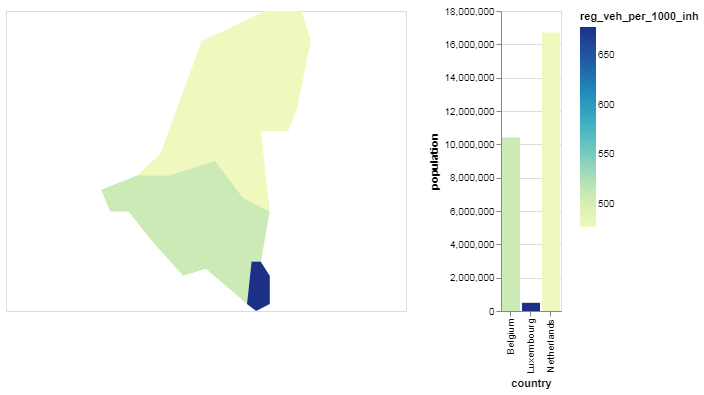

In [42]:
single = alt.selection_single()

b = alt.Chart().mark_bar(tooltip={"content": "data"}
).encode(
    x='country',
    y='population',
    color=alt.condition(single, 'reg_veh_per_1000_inh', alt.value('lightgray'))
).add_selection(single)

g = alt.Chart().mark_geoshape(tooltip={"content": "data"}
).encode(
    color=alt.condition(single, 'reg_veh_per_1000_inh', alt.value('lightgray'))
).add_selection(single)

alt.hconcat(g, b,data=gdf)

In [ ]:
single = alt.selection_single()

b = alt.Chart().mark_bar(tooltip={"content": "data"}
).encode(
    x='country:N',
    y='population:Q',
    color=alt.condition(single, 'reg_veh_per_1000_inh:Q', alt.value('lightgray'))
).add_selection(single)

g = alt.Chart().mark_geoshape(tooltip={"content": "data"}
).encode(
    color=alt.condition(single, 'reg_veh_per_1000_inh:Q', alt.value('lightgray'))
).add_selection(single)

alt.hconcat(g, b,data=gj)